# 1.Import libary

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import missingno as msno

import warnings
warnings.filterwarnings('ignore')

# 2.Load & Describe Data

### 2.2.1 application_train.csv

In [ ]:
!wget -O application_train.csv https://www.dropbox.com/s/jmkpkiasx7553la/application_train.csv?dl=0

--2023-06-12 13:16:06--  https://www.dropbox.com/s/jmkpkiasx7553la/application_train.csv?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601b:18::a27d:812
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/jmkpkiasx7553la/application_train.csv [following]
--2023-06-12 13:16:07--  https://www.dropbox.com/s/raw/jmkpkiasx7553la/application_train.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucc04f11db3eb23c3607a0e82783.dl.dropboxusercontent.com/cd/0/inline/B90OtbnsGrjHUJHQmXD23yaYbn5Mo7wjmeLOl2iik8aIbFgVEU1FjRf_XZknBoIkicfjxTcJp4mRnIQe5gasJbm_V7nujvqt9YUkaWqxYw_NiAIM5mlEVn8cmF02KuTMnRBSul7oDuMdjC6cXreej_F2P_krb3aok4JQPsfGWcUPEw/file# [following]
--2023-06-12 13:16:07--  https://ucc04f11db3eb23c3607a0e82783.dl.dropboxusercontent.com/cd/0/inline/B90OtbnsGrjHUJHQmXD23yaYbn5Mo7wjmeLOl2iik8aIbFgV

In [ ]:
# Menampilkan semua kolom
pd.set_option('display.max_columns', None)
application_train = pd.read_csv('application_train.csv')
application_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [ ]:
application_train.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Non-Null Count   Dtype  
---   ------                        --------------   -----  
 0    SK_ID_CURR                    307511 non-null  int64  
 1    TARGET                        307511 non-null  int64  
 2    NAME_CONTRACT_TYPE            307511 non-null  object 
 3    CODE_GENDER                   307511 non-null  object 
 4    FLAG_OWN_CAR                  307511 non-null  object 
 5    FLAG_OWN_REALTY               307511 non-null  object 
 6    CNT_CHILDREN                  307511 non-null  int64  
 7    AMT_INCOME_TOTAL              307511 non-null  float64
 8    AMT_CREDIT                    307511 non-null  float64
 9    AMT_ANNUITY                   307499 non-null  float64
 10   AMT_GOODS_PRICE               307233 non-null  float64
 11   NAME_TYPE_SUITE               306219 non-null  object 
 12   NAME_INCOME_TYPE            

### 2.2.2 bureau.csv

In [ ]:
!wget -O bureau.csv https://www.dropbox.com/s/k8ise1e1mkh4stf/bureau.csv?dl=0

--2023-06-12 13:16:16--  https://www.dropbox.com/s/k8ise1e1mkh4stf/bureau.csv?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.2.18, 2620:100:601b:18::a27d:812
Connecting to www.dropbox.com (www.dropbox.com)|162.125.2.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/k8ise1e1mkh4stf/bureau.csv [following]
--2023-06-12 13:16:17--  https://www.dropbox.com/s/raw/k8ise1e1mkh4stf/bureau.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc933931bc1aa1df9d11648b64a0.dl.dropboxusercontent.com/cd/0/inline/B93NpV5OYItiRnUVLPYYsH5yveqyPXBYe-MCNSSxG0lyoj8lEQnSuAsnxtLYGbvUYqnvzB0MUYFDLrM9D453DXjvg4Q7aUJmDNxnqNdpzpXxl25T-1f25Xa9NJqhXk-61s4ZRCucM2gGoTTq3hiKxJLE9FPf10WfzQ8wqeTvv6pf1w/file# [following]
--2023-06-12 13:16:17--  https://uc933931bc1aa1df9d11648b64a0.dl.dropboxusercontent.com/cd/0/inline/B93NpV5OYItiRnUVLPYYsH5yveqyPXBYe-MCNSSxG0lyoj8lEQnSuAsnxtLYGbvUYqnvzB0MUYFDLrM9D

In [ ]:
# Menampilkan semua kolom
pd.set_option('display.max_columns', None)
bureau = pd.read_csv('bureau.csv')
bureau.head()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


In [ ]:
bureau.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1716428 entries, 0 to 1716427
Data columns (total 17 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   SK_ID_CURR              1716428 non-null  int64  
 1   SK_ID_BUREAU            1716428 non-null  int64  
 2   CREDIT_ACTIVE           1716428 non-null  object 
 3   CREDIT_CURRENCY         1716428 non-null  object 
 4   DAYS_CREDIT             1716428 non-null  int64  
 5   CREDIT_DAY_OVERDUE      1716428 non-null  int64  
 6   DAYS_CREDIT_ENDDATE     1610875 non-null  float64
 7   DAYS_ENDDATE_FACT       1082775 non-null  float64
 8   AMT_CREDIT_MAX_OVERDUE  591940 non-null   float64
 9   CNT_CREDIT_PROLONG      1716428 non-null  int64  
 10  AMT_CREDIT_SUM          1716415 non-null  float64
 11  AMT_CREDIT_SUM_DEBT     1458759 non-null  float64
 12  AMT_CREDIT_SUM_LIMIT    1124648 non-null  float64
 13  AMT_CREDIT_SUM_OVERDUE  1716428 non-null  float64
 14  CR

## 2.2.3 Merged data(df)

In [ ]:
# Memeriksa duplikasi dalam dataset "bureau" berdasarkan kolom "SK_ID_CURR"
is_duplicate = bureau.duplicated(subset='SK_ID_CURR')

# Menampilkan baris yang merupakan duplikat
duplicate_rows = bureau[is_duplicate]

# Menampilkan jumlah baris yang merupakan duplikat
print("Jumlah baris yang merupakan duplikat:", len(duplicate_rows))

Jumlah baris yang merupakan duplikat: 1410617


In [ ]:
# Menghapus duplikasi berdasarkan SK_ID_CURR pada dataset "bureau"
bureau = bureau.drop_duplicates(subset='SK_ID_CURR', keep='first')

# Mengambil kolom 'SK_ID_CURR' dan 'CREDIT_ACTIVE' dari dataset "bureau"
bureau_subset = bureau[['SK_ID_CURR', 'CREDIT_ACTIVE']]

# Menggabungkan dataset "bureau_subset" dengan "application_train" berdasarkan "SK_ID_CURR" menggunakan left join
df = application_train.merge(bureau_subset, on='SK_ID_CURR', how='left')

In [ ]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,CREDIT_ACTIVE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,Closed
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,Closed
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [ ]:
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307511 entries, 0 to 307510
Data columns (total 123 columns):
 #    Column                        Non-Null Count   Dtype  
---   ------                        --------------   -----  
 0    SK_ID_CURR                    307511 non-null  int64  
 1    TARGET                        307511 non-null  int64  
 2    NAME_CONTRACT_TYPE            307511 non-null  object 
 3    CODE_GENDER                   307511 non-null  object 
 4    FLAG_OWN_CAR                  307511 non-null  object 
 5    FLAG_OWN_REALTY               307511 non-null  object 
 6    CNT_CHILDREN                  307511 non-null  int64  
 7    AMT_INCOME_TOTAL              307511 non-null  float64
 8    AMT_CREDIT                    307511 non-null  float64
 9    AMT_ANNUITY                   307499 non-null  float64
 10   AMT_GOODS_PRICE               307233 non-null  float64
 11   NAME_TYPE_SUITE               306219 non-null  object 
 12   NAME_INCOME_TYPE            

## 2.3 Check Null and Missing Values

In [ ]:
# Mengatur opsi tampilan pandas
pd.set_option('display.max_rows', None)

# fungsi untuk hitung persentase missing value pada DataFrame
def miss_val_percent(data):

    # ambil kolom dengan missing value, jumlahkan missing value
    null_cols = data.columns[data.isnull().any()]
    miss_val_sum = data[null_cols].isnull().sum()

    # ubah menjadi DataFrame, ubah index menjadi 'feature'
    miss_val_df = pd.DataFrame(miss_val_sum, columns=['missing_values'])
    miss_val_df.index.name = 'feature'

    # hitung persentase missing value setiap feature, sorting dan reset index
    miss_val_df['percent'] = miss_val_df['missing_values']. \
    apply(lambda row: round((row / df.shape[0]) * 100, 2)).astype(int)
    miss_val_df.sort_values(by='percent', ascending=False, inplace=True)
    miss_val_df.reset_index(inplace=True)

    return miss_val_df

# apply fungsi untuk hitung persentase missing value
miss_df = miss_val_percent(df)
miss_df

,feature,missing_values,percent
0,COMMONAREA_AVG,214865,69
1,NONLIVINGAPARTMENTS_MEDI,213514,69
2,NONLIVINGAPARTMENTS_MODE,213514,69
3,COMMONAREA_MODE,214865,69
4,NONLIVINGAPARTMENTS_AVG,213514,69
5,COMMONAREA_MEDI,214865,69
6,LIVINGAPARTMENTS_MODE,210199,68
7,LIVINGAPARTMENTS_MEDI,210199,68
8,FONDKAPREMONT_MODE,210295,68
9,LIVINGAPARTMENTS_AVG,210199,68


## 2.4 Duplicate Value

In [ ]:
df.duplicated().sum()

0

## 2.5 Data Numerical

In [ ]:
numerics = ['int8','int16', 'int32', 'int64', 'float16', 'float32', 'float64']
display(df.select_dtypes(include=numerics).columns)
print(df.select_dtypes(include=numerics).shape)
data_num = df.select_dtypes(include=numerics)
data_num.head(3)

Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=106)

(307511, 106)


,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,1.0,2,2,10,0,0,0,0,0,0,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,0.0149,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,2.0,1,1,11,0,0,0,0,0,0,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,0.0714,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,1.0,2,2,9,0,0,0,0,0,0,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


## 2.6 Data Categorical

In [ ]:
display(df.select_dtypes(include=['object']).columns)
print(df.select_dtypes(include=object).shape)
data_cat = df.select_dtypes(include=['object'])
data_cat.head(3)

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE',
       'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE',
       'CREDIT_ACTIVE'],
      dtype='object')

(307511, 17)


,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,FONDKAPREMONT_MODE,HOUSETYPE_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,CREDIT_ACTIVE
0,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3,reg oper account,block of flats,"Stone, brick",No,Closed
1,Cash loans,F,N,N,Family,State servant,Higher education,Married,House / apartment,Core staff,MONDAY,School,reg oper account,block of flats,Block,No,Closed
2,Revolving loans,M,Y,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,MONDAY,Government,NaN,NaN,NaN,NaN,Closed


# 3.Data Preparation

##  3.1 Handle Missing Values

Terdapat 63 kolom yang memiliki missing value.Menghapus kolom dengan missing value diatas >60%.

In [ ]:
# prosedur untuk drop feature dengan threshold missing value
def drop_cols(data1, data2, threshold):
    columns = data2[data2['percent'] >= threshold]['feature'].tolist()
    data1.drop(columns, axis=1, inplace=True)

# apply prosedur untuk drop feature
drop_cols(df, miss_df, 60)
df.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21',
       'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR',
       'CREDIT_ACTIVE'],
      dtype='object', length=106)

In [ ]:
check_df = miss_val_percent(df)
check_df

,feature,missing_values,percent
0,LANDAREA_MEDI,182590,59
1,LANDAREA_AVG,182590,59
2,LANDAREA_MODE,182590,59
3,BASEMENTAREA_AVG,179943,58
4,BASEMENTAREA_MODE,179943,58
5,BASEMENTAREA_MEDI,179943,58
6,EXT_SOURCE_1,173378,56
7,NONLIVINGAREA_AVG,169682,55
8,NONLIVINGAREA_MODE,169682,55
9,NONLIVINGAREA_MEDI,169682,55


Mengisi missing values Numerical dan kategorical dengan median,mean dan modus.

In [ ]:
categorical_cols = df.select_dtypes(include='object'). \
                    columns[df.select_dtypes(include='object').isna().any()].tolist()
numeric_cols = df.select_dtypes(exclude='object') \
                    .columns[df.select_dtypes(exclude='object').isna().any()].tolist()
list_cols = check_df['feature'].tolist()

In [ ]:
def compare_lists(list1, list2):
    matching_values = [value for value in list1 if value in list2]
    return matching_values

numeric_null_cols = compare_lists(list_cols, numeric_cols)
categorical_null_cols = compare_lists(list_cols, categorical_cols)

In [ ]:
def impute_numeric_data(data, columns, mode):
    for col in columns:
        if mode == 'median':
            value = df[col].median()
        elif mode == 'mean':
            value = df[col].mean()
        df[col].fillna(value, inplace=True)

    return data

def impute_categoric_data(data, columns):
    for col in columns:
        mode_value = df[col].mode().iloc[0]
        df[col].fillna(mode_value, inplace=True)
    return data

In [ ]:
df = impute_numeric_data(df, numeric_null_cols, 'median')
df = impute_categoric_data(df, categorical_null_cols)

In [ ]:
df.isnull().sum()

SK_ID_CURR                      0
TARGET                          0
NAME_CONTRACT_TYPE              0
CODE_GENDER                     0
FLAG_OWN_CAR                    0
FLAG_OWN_REALTY                 0
CNT_CHILDREN                    0
AMT_INCOME_TOTAL                0
AMT_CREDIT                      0
AMT_ANNUITY                     0
AMT_GOODS_PRICE                 0
NAME_TYPE_SUITE                 0
NAME_INCOME_TYPE                0
NAME_EDUCATION_TYPE             0
NAME_FAMILY_STATUS              0
NAME_HOUSING_TYPE               0
REGION_POPULATION_RELATIVE      0
DAYS_BIRTH                      0
DAYS_EMPLOYED                   0
DAYS_REGISTRATION               0
DAYS_ID_PUBLISH                 0
FLAG_MOBIL                      0
FLAG_EMP_PHONE                  0
FLAG_WORK_PHONE                 0
FLAG_CONT_MOBILE                0
FLAG_PHONE                      0
FLAG_EMAIL                      0
OCCUPATION_TYPE                 0
CNT_FAM_MEMBERS                 0
REGION_RATING_

Menyimpan dataset ke dalam variabel baru

In [ ]:
df2 = df.copy()

## 3.2 Fixing Outlier

Memperbaiki outlier pada kolom 'Days_Employed'

In [ ]:
# Menghitung frekuensi kemunculan nilai 365243 pada kolom 'DAYS_EMPLOYED'
frequency = df2['DAYS_EMPLOYED'].eq(365243).sum()

# Menghitung jumlah total baris dalam kolom 'DAYS_EMPLOYED'
total_rows = len(df2)

# Menghitung persentase kemunculan nilai 365243
percentage = (frequency / total_rows) * 100

# Menampilkan hasil frekuensi dan persentase kemunculan
print("Frekuensi: ", frequency)
print("Persentase: ", percentage, "%")

Frekuensi:  55374
Persentase:  18.00716071945394 %


In [ ]:
#mengisi nilai max 'DAYS_EMPLOYED' dengan nan
df2.replace(max(df2['DAYS_EMPLOYED'].values), np.nan, inplace=True)
# Mengisi nilai NaN dengan nilai median
df2['DAYS_EMPLOYED'].fillna(df2['DAYS_EMPLOYED'].median(), inplace=True)

In [ ]:
df2['DAYS_EMPLOYED'].describe()

count    307511.000000
mean      -2251.606131
std        2136.193492
min      -17912.000000
25%       -2760.000000
50%       -1648.000000
75%        -933.000000
max           0.000000
Name: DAYS_EMPLOYED, dtype: float64

## 3.3 Remove features

Menghapus kolom numerical yang memiliki korelas di bawah 0.009 terhadap kolom 'TARGET'

In [ ]:
# Menghitung korelasi antara kolom numerik dengan kolom TARGET
correlation_num = data_num.corr()['TARGET'].sort_values(ascending=False).reset_index()
correlation_num = correlation_num.rename(columns={'index': 'feature', 'TARGET': 'correlation_score'})
correlation_num

,feature,correlation_score
0,TARGET,1.000000
1,DAYS_BIRTH,0.078239
2,REGION_RATING_CLIENT_W_CITY,0.060893
3,REGION_RATING_CLIENT,0.058899
4,DAYS_LAST_PHONE_CHANGE,0.055218
5,DAYS_ID_PUBLISH,0.051457
6,REG_CITY_NOT_WORK_CITY,0.050994
7,FLAG_EMP_PHONE,0.045982
8,REG_CITY_NOT_LIVE_CITY,0.044395
9,FLAG_DOCUMENT_3,0.044346


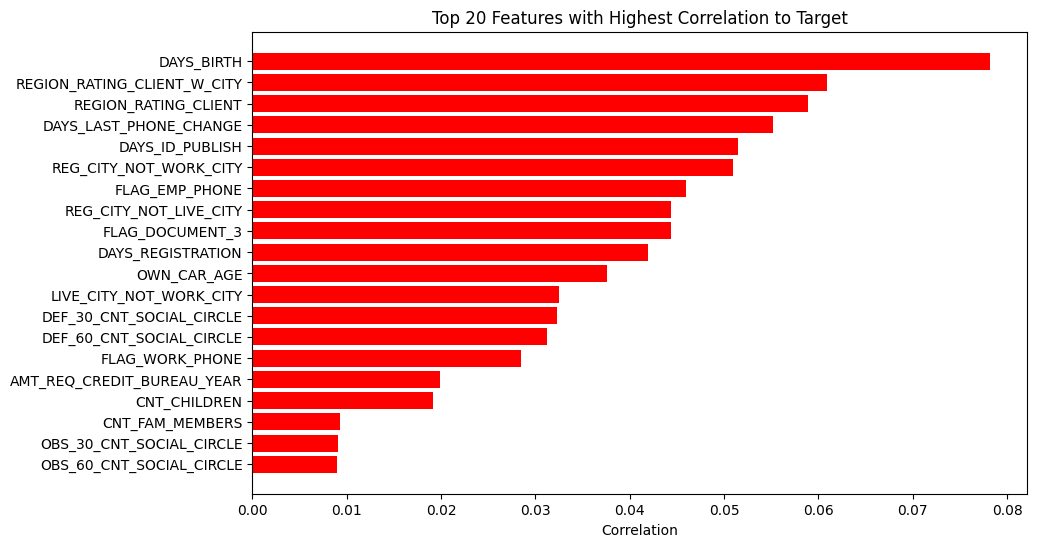

In [ ]:
# Menghitung korelasi antara fitur numerik dengan target
correlation = data_num.corr()['TARGET']

# Mengurutkan fitur berdasarkan nilai korelasi tertinggi dari atas
top_20_features = correlation.drop('TARGET').nlargest(20)

# Mengambil nama fitur dan nilai korelasinya
features = top_20_features.index[::-1]  # Mengurutkan secara terbalik (dari teratas)
importances = top_20_features.values[::-1]  # Mengurutkan secara terbalik (dari teratas)

# Mengatur posisi dan label pada sumbu y
indices = np.arange(len(features))

# Membuat visualisasi bar plot
plt.figure(figsize=(10, 6))
plt.title('Top 20 Features with Highest Correlation to Target')
plt.barh(indices, importances, color='red', align='center')
plt.yticks(indices, features)
plt.xlabel('Correlation')

plt.show()

In [ ]:
# Ambang batas korelasi yang diinginkan
threshold = 0.009

# Filter DataFrame berdasarkan ambang batas korelasi
correlation_filtered = correlation_num[correlation_num['correlation_score'] >= threshold]
correlation_filtered

,feature,correlation_score
0,TARGET,1.000000
1,DAYS_BIRTH,0.078239
2,REGION_RATING_CLIENT_W_CITY,0.060893
3,REGION_RATING_CLIENT,0.058899
4,DAYS_LAST_PHONE_CHANGE,0.055218
5,DAYS_ID_PUBLISH,0.051457
6,REG_CITY_NOT_WORK_CITY,0.050994
7,FLAG_EMP_PHONE,0.045982
8,REG_CITY_NOT_LIVE_CITY,0.044395
9,FLAG_DOCUMENT_3,0.044346


In [ ]:
# Mengambil daftar kolom yang harus dihapus
columns_to_drop = df.select_dtypes(include=['float64', 'int64']).columns.difference(correlation_filtered['feature'])

# Menghapus beberapa kolom dari daftar kolom yang harus dihapus
columns_to_drop = columns_to_drop.difference(['AMT_CREDIT', 'AMT_INCOME_TOTAL','EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3','DAYS_EMPLOYED'])

# Menghapus kolom-kolom yang harus dihapus dari DataFrame df
df2 = df.drop(columns=columns_to_drop)

In [ ]:
df2.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307511 entries, 0 to 307510
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   TARGET                       307511 non-null  int64  
 1   NAME_CONTRACT_TYPE           307511 non-null  object 
 2   CODE_GENDER                  307511 non-null  object 
 3   FLAG_OWN_CAR                 307511 non-null  object 
 4   FLAG_OWN_REALTY              307511 non-null  object 
 5   CNT_CHILDREN                 307511 non-null  int64  
 6   AMT_INCOME_TOTAL             307511 non-null  float64
 7   AMT_CREDIT                   307511 non-null  float64
 8   NAME_TYPE_SUITE              307511 non-null  object 
 9   NAME_INCOME_TYPE             307511 non-null  object 
 10  NAME_EDUCATION_TYPE          307511 non-null  object 
 11  NAME_FAMILY_STATUS           307511 non-null  object 
 12  NAME_HOUSING_TYPE            307511 non-null  object 
 13 

Menghapus beberapa fitur yang tidak terlalu penting

In [ ]:
df2 = df2.drop(['CNT_CHILDREN','FLAG_OWN_CAR','NAME_TYPE_SUITE','WEEKDAY_APPR_PROCESS_START','ORGANIZATION_TYPE','HOUSETYPE_MODE','WALLSMATERIAL_MODE','EMERGENCYSTATE_MODE','CNT_FAM_MEMBERS','OBS_30_CNT_SOCIAL_CIRCLE'], axis=1)

## 3.4 Remove unique value

Remove unique value yang frekuensi nya dibawah 1%

CODE_GENDER

In [ ]:
df2=df2[~df2['CODE_GENDER'].isin(['XNA'])]

NAME_INCOME_TYPE

In [ ]:
df2=df2[~df2['NAME_INCOME_TYPE'].isin(['Unemployed','Student','Businessman','Maternity leave'])]

NAME_HOUSING_TYPE

In [ ]:
df2=df2[~df2['NAME_HOUSING_TYPE'].isin(['Office apartment','Co-op apartment'])]

OCCUPATION_TYPE

In [ ]:
df2=df2[~df2['OCCUPATION_TYPE'].isin(['IT staff','HR staff','Realty agents','Secretaries','Waiters/barmen staff','Low-skill Laborers','Privates service staff'])]

In [ ]:
df2.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297227 entries, 0 to 307510
Data columns (total 32 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   TARGET                       297227 non-null  int64  
 1   NAME_CONTRACT_TYPE           297227 non-null  object 
 2   CODE_GENDER                  297227 non-null  object 
 3   FLAG_OWN_REALTY              297227 non-null  object 
 4   AMT_INCOME_TOTAL             297227 non-null  float64
 5   AMT_CREDIT                   297227 non-null  float64
 6   NAME_INCOME_TYPE             297227 non-null  object 
 7   NAME_EDUCATION_TYPE          297227 non-null  object 
 8   NAME_FAMILY_STATUS           297227 non-null  object 
 9   NAME_HOUSING_TYPE            297227 non-null  object 
 10  DAYS_BIRTH                   297227 non-null  int64  
 11  DAYS_EMPLOYED                297227 non-null  int64  
 12  DAYS_REGISTRATION            297227 non-null  float64
 13 

In [ ]:
# df2.to_csv(f'Data_Dashboard.csv', index=False)

## 3.5 Categorical Data Encoding

One hot encoding pada kolom kategorical

In [ ]:
  df2 = pd.get_dummies(df2, columns=list(df2.select_dtypes(include='object').columns))

In [ ]:
  df2.head()

,TARGET,AMT_INCOME_TOTAL,AMT_CREDIT,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_EMP_PHONE,FLAG_WORK_PHONE,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3,AMT_REQ_CREDIT_BUREAU_YEAR,NAME_CONTRACT_TYPE_Cash loans,NAME_CONTRACT_TYPE_Revolving loans,CODE_GENDER_F,CODE_GENDER_M,FLAG_OWN_REALTY_N,FLAG_OWN_REALTY_Y,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Academic degree,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_FAMILY_STATUS_Civil marriage,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Unknown,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,OCCUPATION_TYPE_Accountants,OCCUPATION_TYPE_Cleaning staff,OCCUPATION_TYPE_Cooking staff,OCCUPATION_TYPE_Core staff,OCCUPATION_TYPE_Drivers,OCCUPATION_TYPE_High skill tech staff,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Security staff,CREDIT_ACTIVE_Active,CREDIT_ACTIVE_Bad debt,CREDIT_ACTIVE_Closed,CREDIT_ACTIVE_Sold
0,1,202500.0,406597.5,-9461,-637,-3648.0,-2120,1,0,2,2,0,0,0,0.083037,0.262949,0.139376,2.0,2.0,2.0,-1134.0,1,1.0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
1,0,270000.0,1293502.5,-16765,-1188,-1186.0,-291,1,0,1,1,0,0,0,0.311267,0.622246,0.535276,0.0,1.0,0.0,-828.0,1,0.0,1,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
2,0,67500.0,135000.0,-19046,-225,-4260.0,-2531,1,1,2,2,0,0,0,0.505998,0.555912,0.729567,0.0,0.0,0.0,-815.0,0,0.0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
3,0,135000.0,312682.5,-19005,-3039,-9833.0,-2437,1,0,2,2,0,0,0,0.505998,0.650442,0.535276,0.0,2.0,0.0,-617.0,1,1.0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
4,0,121500.0,513000.0,-19932,-3038,-4311.0,-3458,1,0,2,2,0,1,1,0.505998,0.322738,0.535276,0.0,0.0,0.0,-1106.0,0,0.0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0


In [ ]:
df2.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297227 entries, 0 to 307510
Data columns (total 64 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   TARGET                                             297227 non-null  int64  
 1   AMT_INCOME_TOTAL                                   297227 non-null  float64
 2   AMT_CREDIT                                         297227 non-null  float64
 3   DAYS_BIRTH                                         297227 non-null  int64  
 4   DAYS_EMPLOYED                                      297227 non-null  int64  
 5   DAYS_REGISTRATION                                  297227 non-null  float64
 6   DAYS_ID_PUBLISH                                    297227 non-null  int64  
 7   FLAG_EMP_PHONE                                     297227 non-null  int64  
 8   FLAG_WORK_PHONE                                    297227 non-null  int64 

# 4.Eksport Data Preprocessing

In [ ]:
# df2.to_csv(f'Data_Preprocessing_final.csv', index=False)